In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 3296.63it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [20]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [21]:
# city_sub_order_route_dict

In [22]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [23]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [24]:
# city_sub_all_shortest_paths_id_dict

In [25]:
# city_sub_edges

In [26]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [27]:
# city_sub_ordered_edges

In [28]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [29]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [30]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [31]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [32]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [33]:
# city_sub_extended_edges

### Organize edges dataframe for baseline network--city_sub_new_edges

In [34]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [35]:
# city_sub_shortest_path_edges_df

In [36]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [37]:
# city_sub_new_edges

### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [38]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [39]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [40]:
# city_sub_shortest_path_nodes_id

In [41]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [42]:
# city_sub_new_nodes

### Add columns to stations--city_sub_new_staions

In [43]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [44]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [45]:
# city_sub_new_stations

## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [46]:
connect_stations_name,connect_stations_dataframe = select_connect_stations_one_network(city_sub_new_stations)

In [47]:
connect_stations_name

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [48]:
# connect_stations_dataframe

### Build connection edges

In [49]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [50]:
# city_sub_connected_edges

# Tram-Amsterdam

## Generate Baseline Networks

In [51]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 3582.65it/s]


Calculate_degree possibly unhappy


In [52]:
# city_tram_stations

In [53]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [54]:
id_nodes_length_tram

1920

In [55]:
id_edges_length_tram 

2204

In [56]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [57]:
# city_tram_edges

In [58]:
# city_tram_nodes

In [59]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [60]:
gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time','weights']]).to_file('city_tram_edges0502.GPKG',driver='GPKG')

In [61]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [62]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)
city_tram_edges = city_tram_edges.reset_index(drop = True)

In [63]:
# city_tram_edges

In [64]:
# city_tram_nodes

In [65]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [66]:
# city_tram_stations

In [67]:
# city_tram_routes

In [68]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [69]:
# city_tram_order_id_pairs

In [70]:
# city_tram_all_shortest_paths_id_dict

In [71]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [72]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [73]:
# duplicated_rows

In [74]:
len(duplicated_rows)

24

In [75]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [76]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [77]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [78]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [79]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [80]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [81]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [82]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [83]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [84]:
# city_tram_shortest_path_edges_df

In [85]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [86]:
# city_tram_new_edges

In [87]:
gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_new_edges0506.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [88]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [89]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [90]:
# city_tram_shortest_path_nodes_id

In [91]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [92]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [93]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [94]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [95]:
# city_tram_new_stations

## Create virtual edges at connection stations on single tram network 

#### Select nodes where need to build virtual edges based on name

In [96]:
connect_stations_name,connect_stations_dataframe = select_connect_stations_one_network(city_tram_new_stations)

In [97]:
connect_stations_name

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [98]:
# len(connect_stations_name)

In [99]:
# connect_stations_dataframe

### Build connection edges

In [100]:
id_new_edges_length_tram = city_tram_new_edges['id'].iloc[-1] + 1

In [101]:
# id_new_edges_length_tram

In [102]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name,city_tram_new_stations,id_new_edges_length_tram,city_tram_new_edges)

In [103]:
len(city_tram_connect_edges_dfs)

16

In [104]:
# city_tram_connected_edges

In [105]:
# city_tram_connect_edges_dfs

In [106]:
# city_tram_connected_edges[city_tram_connected_edges['id'] == 3169]

In [107]:
gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_connected_edges20240504.gpkg',driver = 'GPKG')

# Create more OD pairs

In [108]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()
for route_name, station_df in city_sub_order_route_dict.items():
    first_row_index = 0
    middle_row_index = len(station_df)//2
    each_o_point = station_df.iloc[[first_row_index,middle_row_index]]
    origin_df = pd.concat([origin_df,each_o_point])
origin_df.drop_duplicates(subset='geometry', inplace = True)

selected_columns = ['geometry','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)
origin_id_df = pd.merge(origin_df,city_sub_new_nodes,on='geometry',how='left')

In [109]:
origin_df

,geometry,name
0,POINT (4.9891612 52.2964067),Gein
1,POINT (4.8739633 52.3393223),Zuid
2,POINT (4.8505967 52.3952329),Isolatorweg
3,POINT (4.8894203 52.3376062),Station RAI
4,POINT (4.9008686 52.3773546),Centraal Station
5,POINT (4.8739781 52.3390351),Zuid
6,POINT (4.932402 52.4021571),Noord
7,POINT (4.8910469 52.3606866),Vijzelgracht
8,POINT (4.8780248 52.3393025),Zuid
9,POINT (4.8927726 52.3704434),Rokin


In [110]:
origin_id_df

,geometry,name,id,degree
0,POINT (4.9891612 52.2964067),Gein,328,2
1,POINT (4.8739633 52.3393223),Zuid,840,2
2,POINT (4.8505967 52.3952329),Isolatorweg,845,2
3,POINT (4.8894203 52.3376062),Station RAI,858,2
4,POINT (4.9008686 52.3773546),Centraal Station,731,2
5,POINT (4.8739781 52.3390351),Zuid,83,2
6,POINT (4.932402 52.4021571),Noord,630,2
7,POINT (4.8910469 52.3606866),Vijzelgracht,861,2
8,POINT (4.8780248 52.3393025),Zuid,345,2
9,POINT (4.8927726 52.3704434),Rokin,865,2


In [111]:
# origin_df = pd.DataFrame()
# each_o_point = pd.DataFrame()
# for route_name, station_df in city_sub_order_route_dict.items():
#     first_row_index = 0
#     middle_row_index = len(station_df)//2
#     each_o_point = station_df.iloc[first_row_index:middle_row_index] 
#     origin_df = pd.concat([origin_df,each_o_point])
# origin_df.drop_duplicates(subset='geometry', inplace = True)

# selected_columns = ['geometry','name']
# origin_df = origin_df[selected_columns].reset_index(drop=True)
# origin_id_df = pd.merge(origin_df,city_sub_new_nodes,on='geometry',how='left')

In [112]:
# origin_id_df

In [113]:
# city_sub_new_stations

In [114]:
# city_tram_new_stations

In [115]:
# city_two_layer_stations = pd.concat([city_sub_new_stations, city_tram_new_stations]).reset_index(drop=True)
# condition_for_remove_stations = ~city_two_layer_stations['geometry'].isin(list(origin_id_df.geometry))
# destination_stations = city_two_layer_stations[condition_for_remove_stations]
# destination_stations

In [116]:
# destination_id_df = destination_stations[['geometry','name','id','degree']].reset_index(drop=True)
# destination_id_df

In [117]:
# destination_id_df[destination_id_df['name']=='Bijlmer ArenA']

In [118]:
# destination_id_df.drop(destination_id_df[destination_id_df['id'] == 301].index, inplace=True)
# destination_id_df.reset_index(drop=True,inplace=True)
# destination_id_df.drop(destination_id_df[destination_id_df['id'] == 808].index, inplace=True)
# destination_id_df.reset_index(drop=True,inplace=True)
# destination_id_df.drop(destination_id_df[destination_id_df['id'] == 809].index, inplace=True)
# destination_id_df.reset_index(drop=True,inplace=True)
# destination_id_df.drop(destination_id_df[destination_id_df['id'] == 810].index, inplace=True)
# destination_id_df.reset_index(drop=True,inplace=True)

In [119]:
# destination_id_df

In [120]:
# destination_df = pd.DataFrame()
# each_d_point = pd.DataFrame()

# # for route_name, station_df in city_sub_order_route_dict.items():
# #     each_o_point = station_df.iloc[[-1,-2,-3,-4,-5,-6]]
# #     destination_df = pd.concat([destination_df,each_o_point])
# # for route_name, station_df in city_tram_order_route_dict.items():
# #     each_o_point = station_df.iloc[[-1]]
# #     destination_df = pd.concat([destination_df,each_o_point])
# for route_name, station_df in city_sub_order_route_dict.items():
#     middle_row_index = len(station_df)//2
#     each_o_point = station_df.iloc[middle_row_index+1:]
#     destination_df = pd.concat([destination_df,each_o_point])
# destination_df.drop_duplicates(subset='geometry', inplace = True)
# destination_df.drop_duplicates(subset='name', inplace = True)

# selected_columns = ['geometry','name']
# destination_df = destination_df[selected_columns].reset_index(drop=True)
# destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')

In [121]:
# destination_id_df

In [122]:
# destination_id_df.drop(destination_id_df[destination_id_df['id'] == 808].index, inplace=True)
# destination_id_df.reset_index(drop=True,inplace=True)
# destination_id_df.drop(destination_id_df[destination_id_df['id'] == 809].index, inplace=True)
# destination_id_df.reset_index(drop=True,inplace=True)


In [123]:
# city_tram_order_route_dict

In [124]:
# destination_df2 = pd.DataFrame()
# for route_name, station_df in city_tram_order_route_dict.items():
#     each_o_point = station_df.iloc[[-1]]
#     destination_df2 = pd.concat([destination_df2,each_o_point])
# destination_df2
# destination_df2.drop_duplicates(subset='geometry', inplace = True)

# selected_columns = ['geometry','name']
# destination_df2 = destination_df2[selected_columns].reset_index(drop=True)
# destination_id_df2 = pd.merge(destination_df2,city_tram_new_nodes,on='geometry',how='left')
# destination_id_df2

In [125]:
destination_df = pd.DataFrame()
each_d_point = pd.DataFrame()
for route_name, station_df in city_sub_order_route_dict.items():
    each_o_point = station_df.iloc[[-1,-2]]
    destination_df = pd.concat([destination_df,each_o_point])
destination_df.drop_duplicates(subset='geometry', inplace = True)

selected_columns = ['geometry','name']
destination_df = destination_df[selected_columns].reset_index(drop=True)
destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')

In [126]:
destination_df

,geometry,name
0,POINT (4.8505958 52.3951031),Isolatorweg
1,POINT (4.8389786 52.3890375),Station Sloterdijk
2,POINT (4.989299 52.2962711),Gein
3,POINT (4.9743774 52.2955964),Reigersbos
4,POINT (4.9010471 52.3775081),Centraal Station
5,POINT (4.9010846 52.371353),Nieuwmarkt
6,POINT (4.8772326 52.3393181),Zuid
7,POINT (4.8915605 52.3411785),Europaplein
8,POINT (4.932585 52.4020575),Noord
9,POINT (4.9182755 52.3885941),Noorderpark


In [127]:
destination_id_df

,geometry,name,id,degree
0,POINT (4.8505958 52.3951031),Isolatorweg,805,2
1,POINT (4.8389786 52.3890375),Station Sloterdijk,121,2
2,POINT (4.989299 52.2962711),Gein,323,2
3,POINT (4.9743774 52.2955964),Reigersbos,144,2
4,POINT (4.9010471 52.3775081),Centraal Station,728,2
5,POINT (4.9010846 52.371353),Nieuwmarkt,866,2
6,POINT (4.8772326 52.3393181),Zuid,180,3
7,POINT (4.8915605 52.3411785),Europaplein,860,2
8,POINT (4.932585 52.4020575),Noord,716,2
9,POINT (4.9182755 52.3885941),Noorderpark,817,2


In [128]:
OD_id_list = []

for index_origin, row_origin in origin_id_df.iterrows():

       
    for index_destination, row_destination in destination_id_df.iterrows():


        if row_origin['name'] != row_destination['name']:
            # Append a dictionary to the list
            OD_id_list.append({
                's_id': row_origin['id'],
                'e_id': row_destination['id']
             })

# Create a DataFrame from the list of dictionaries
OD_id_pairs_df = pd.DataFrame(OD_id_list)  
OD_id_pairs_df

,s_id,e_id
0,328,805
1,328,121
2,328,144
3,328,728
4,328,866
...,...,...
167,828,860
168,828,716
169,828,817
170,828,61


In [129]:
OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
OD_id_pairs_df.sort_values(by='e_id')

,s_id,e_id
0,328,61
13,731,61
12,845,61
11,861,61
9,865,61
...,...,...
158,845,866
157,861,866
170,731,866
163,825,866


In [130]:
OD_id_pairs_df.drop(OD_id_pairs_df[(OD_id_pairs_df['s_id'] == 825) & (OD_id_pairs_df['e_id'] == 301)].index, inplace=True)
OD_id_pairs_df.reset_index(drop=True, inplace=True)

In [131]:
OD_id_pairs_df

,s_id,e_id
0,328,61
1,826,61
2,840,61
3,630,61
4,858,61
...,...,...
167,345,866
168,328,866
169,826,866
170,731,866


# Create Connect Edges in 300m for Metro and Tram

In [132]:
buffer_radius = 300

In [133]:
sub_new_stations_buffer_geometry = new_nodes_buffer(city_sub_new_stations,buffer_radius)
sub_new_stations_buffer_geometry

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer,buffer_geometry
0,328,POINT (555390.884 6853898.052),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((555690.884 6853898.052, 555689.440 6..."
1,855,POINT (553703.169 6853757.861),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((554003.169 6853757.861, 554001.725 6..."
2,854,POINT (552158.745 6854212.080),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((552458.745 6854212.080, 552457.301 6..."
3,810,POINT (551268.501 6855802.630),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551568.501 6855802.630, 551567.056 6..."
4,809,POINT (550766.294 6856701.528),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551066.294 6856701.528, 551064.850 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (552961.225 6859717.546),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((553261.225 6859717.546, 553259.780 6..."
83,823,POINT (551775.962 6860088.944),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((552075.962 6860088.944, 552074.517 6..."
84,829,POINT (550617.070 6859438.093),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((550917.070 6859438.093, 550915.626 6..."
85,827,POINT (548836.771 6859966.806),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54","POLYGON ((549136.771 6859966.806, 549135.327 6..."


In [134]:
city_tram_new_stations_ftn = add_footnote_to_new_nodes(city_tram_new_stations)
city_tram_new_stations_ftn

,id_tram,geometry_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,2209,POINT (549095.945 6865626.846),2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,2371,POINT (548687.336 6865651.437),2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,2474,POINT (548326.739 6865502.838),2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,2480,POINT (547329.238 6865312.719),2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,2466,POINT (546978.593 6865909.649),2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (548393.230 6866966.046),2,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,2676,POINT (548760.528 6867340.750),2,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,2383,POINT (549343.063 6867853.627),2,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,2619,POINT (549714.592 6867935.478),2,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [135]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_stations_buffer_geometry,city_tram_new_stations_ftn)
transfer_stations_sub_to_tram

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,...,geometry_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,819,POINT (547403.1208118391 6863046.022174509),2,Amstelstation,4.917406,52.346636,"(4.9174059, 52.3466361)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (547457.512 6863193.427),2,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
1,820,POINT (547411.0022317873 6863048.24534716),2,Amstelstation,4.917477,52.346648,"(4.9174767, 52.3466483)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,POINT (547457.512 6863193.427),2,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
2,834,POINT (540744.7124492757 6861534.261047471),2,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,POINT (540706.441 6861549.328),2,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
3,834,POINT (540744.7124492757 6861534.261047471),2,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,POINT (540712.274 6861514.766),2,Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"2, 24","2, 24"
4,835,POINT (540742.3190802236 6861559.002901717),2,Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,subway,"50, 51",...,POINT (540706.441 6861549.328),2,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,138,POINT (546346.9548790398 6865723.4216876915),2,Weesperplein,4.907918,52.361326,"(4.9079182, 52.3613263)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,POINT (546258.244 6865664.324),2,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
110,460,POINT (546339.0511951934 6865720.341024122),2,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (546485.013 6865737.622),2,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"
111,460,POINT (546339.0511951934 6865720.341024122),2,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (546258.244 6865664.324),2,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
112,840,POINT (542567.1127011032 6861713.358806675),2,Zuid,4.873963,52.339322,"(4.8739633, 52.3393223)",Metro 50: Gein => Isolatorweg,subway,"50, 51, 52",...,POINT (542480.462 6861985.602),2,Station Zuid,4.873185,52.340817,"(4.8731849, 52.3408165)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


In [136]:
transfer_stations_sub_to_tram.loc[:,['name','name_tram']]

,name,name_tram
0,Amstelstation,Amstelstation
1,Amstelstation,Amstelstation
2,Amstelveenseweg,Amstelveenseweg
3,Amstelveenseweg,Amstelveenseweg
4,Amstelveenseweg,Amstelveenseweg
...,...,...
109,Weesperplein,Weesperplein
110,Weesperplein,Weesperplein
111,Weesperplein,Weesperplein
112,Zuid,Station Zuid


In [137]:
transfer_stations_sub_to_tram.to_excel('transfer_stations_sub_to_tram_0426.xlsx',header = True,index = False)

In [138]:
connect_edges_sub_to_tram = create_connect_edges(transfer_stations_sub_to_tram)
connect_edges_sub_to_tram

,geometry,from_id,to_id,from_to,to_from
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)"
1,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",820,2101,"(820, 2101)","(2101, 820)"
2,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",834,2515,"(834, 2515)","(2515, 834)"
3,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",834,2516,"(834, 2516)","(2516, 834)"
4,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)"
...,...,...,...,...,...
109,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",2448,138,"(2448, 138)","(138, 2448)"
110,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",2449,460,"(2449, 460)","(460, 2449)"
111,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",2448,460,"(2448, 460)","(460, 2448)"
112,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",1068,840,"(1068, 840)","(840, 1068)"


In [139]:
start_id_for_connect_edges_sub_to_tram = city_tram_connected_edges['id'].iloc[-1] + 1
start_id_for_connect_edges_sub_to_tram

3297

In [140]:
connect_edges_sub_to_tram_id_list = [start_id_for_connect_edges_sub_to_tram] + [i for i in range(start_id_for_connect_edges_sub_to_tram + 1, start_id_for_connect_edges_sub_to_tram + len(connect_edges_sub_to_tram))]
# connect_edges_sub_to_tram_id_list

In [141]:
connect_edges_sub_to_tram['id'] = connect_edges_sub_to_tram_id_list

# Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
# Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + city_tram_new_edges.sort_values(by='time').time.iloc[-1] + 1

In [142]:
connect_edges_sub_to_tram

,geometry,from_id,to_id,from_to,to_from,id,weights,time
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)",3297,10000002763,1.16254
1,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",820,2101,"(820, 2101)","(2101, 820)",3298,10000002763,1.16254
2,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",834,2515,"(834, 2515)","(2515, 834)",3299,10000002763,1.16254
3,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",834,2516,"(834, 2516)","(2516, 834)",3300,10000002763,1.16254
4,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)",3301,10000002763,1.16254
...,...,...,...,...,...,...,...,...
109,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",2448,138,"(2448, 138)","(138, 2448)",3520,10000002763,1.16254
110,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",2449,460,"(2449, 460)","(460, 2449)",3521,10000002763,1.16254
111,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",2448,460,"(2448, 460)","(460, 2448)",3522,10000002763,1.16254
112,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",1068,840,"(1068, 840)","(840, 1068)",3523,10000002763,1.16254


In [143]:
# city_sub_new_stations

In [144]:
# city_tram_new_stations

# Test OD pairs on normal situation

### Load DiGraph with city_two_layer_network_nodes and city_two_layer_network_edges

In [145]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])

In [146]:
city_two_layer_network_edges = pd.concat([city_sub_connected_edges,city_tram_connected_edges,connect_edges_sub_to_tram])
# city_two_layer_network_edges

In [147]:
G1 = nx.DiGraph()
for node_index, row in city_two_layer_network_nodes.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [148]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
edges_for_G1['time'] = edges_for_G1['time']
edges_for_G1['weights'] = edges_for_G1['weights']
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    # capacity = row['capacity']
    # length = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

### Test all OD pairs

In [149]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weights")
    OD_shortest_path_nodes_id[index] = path_s_e
    OD_shortest_path_edges[index] = short_path_edges

In [150]:
OD_shortest_path_edges

{0:          osm_id                                           geometry railway  \
 30     23208093  LINESTRING (4.9339577 52.3261614, 4.9340434 52...  subway   
 31     23208094  LINESTRING (4.9340434 52.3260815, 4.9341338 52...  subway   
 32     23208110  LINESTRING (4.942156 52.3249886, 4.9432573 52....  subway   
 33     23208134  LINESTRING (4.9530035 52.3291532, 4.9532464 52...  subway   
 34     23208156  LINESTRING (4.9568748 52.3303434, 4.9578699 52...  subway   
 ..          ...                                                ...     ...   
 517   504584809  LINESTRING (4.9607039 52.2974968, 4.9602721 52...  subway   
 518   504584816  LINESTRING (4.959964 52.2983094, 4.9592334 52....  subway   
 612  1013175524  LINESTRING (4.9578699 52.330659, 4.9579865 52....  subway   
 661         NaN  LINESTRING (4.9304544 52.3297847, 4.9302391 52...     NaN   
 666         NaN  LINESTRING (4.9302391 52.3297174, 4.9304544 52...     NaN   
 
     service   id  from_id  to_id    distance  

In [151]:
OD_shortest_path_nodes_id

{0: [328,
  654.0,
  321.0,
  318.0,
  634.0,
  317.0,
  330.0,
  329.0,
  342.0,
  429.0,
  428.0,
  424.0,
  423.0,
  855.0,
  422.0,
  339.0,
  334.0,
  333.0,
  338.0,
  324.0,
  325.0,
  420.0,
  702.0,
  296.0,
  286.0,
  287.0,
  703.0,
  290.0,
  854.0,
  291.0,
  292.0,
  288.0,
  573.0,
  561.0,
  289.0,
  418.0,
  419.0,
  417.0,
  610.0,
  416.0,
  699.0,
  415.0,
  143.0,
  810.0,
  142.0,
  412.0,
  697.0,
  411.0,
  809.0,
  408.0,
  664.0,
  666.0,
  149.0,
  148.0,
  405.0,
  404.0,
  403.0,
  808.0,
  400.0,
  399.0,
  219.0,
  64.0,
  852.0,
  46.0,
  45.0,
  44.0,
  227.0,
  211.0,
  218.0,
  240.0,
  828.0,
  826.0,
  224.0,
  526.0,
  530.0,
  223.0,
  217.0,
  237.0,
  216.0,
  238.0,
  208.0,
  209.0,
  47.0,
  48.0,
  141.0,
  383.0,
  811.0,
  384.0,
  388.0,
  521.0,
  65.0,
  509.0,
  49.0,
  50.0,
  191.0,
  822.0,
  51.0,
  52.0,
  389.0,
  55.0,
  53.0,
  54.0,
  146.0,
  529.0,
  535.0,
  150.0,
  151.0,
  297.0,
  56.0,
  812.0,
  57.0,
  60.0,
  503.0,

In [152]:
len(OD_shortest_path_nodes_id)

172

In [153]:
len(OD_shortest_path_edges)

172

# Test tageted attack on each edges 

In [154]:
def parameter_scl(OD_shortest_path_nodes_id):
    sink_id = [lst[-1] for lst in OD_shortest_path_nodes_id.values()]
    OD_sink_id_df = pd.DataFrame({'id': sink_id})
    OD_sink_id_df = OD_sink_id_df.sort_values(by='id').reset_index(drop=True)
    OD_sink_id_df['count'] = OD_sink_id_df.groupby('id')['id'].transform('count')
    OD_sink_id_df = OD_sink_id_df.drop_duplicates(subset=['id']).reset_index(drop=True)
    
    return OD_sink_id_df

In [155]:
def OD_sink_id_scl(OD_shortest_path_nodes_id,OD_dis_shortest_path_nodes_id):
    OD_sink_id_normal = parameter_scl(OD_shortest_path_nodes_id)
    OD_sink_id_disruption = parameter_scl(OD_dis_shortest_path_nodes_id)
    OD_sink_id = pd.merge(OD_sink_id_normal,OD_sink_id_disruption,on='id',how='outer')
    OD_sink_id['count_y'] = OD_sink_id['count_y'].fillna(0)
    OD_sink_id['connectivity_loss'] = OD_sink_id.apply(lambda row: row['count_y'] / row['count_x'], axis=1)
    
    
    return OD_sink_id

In [156]:
city_two_layer_network_edges.reset_index(drop=True,inplace=True)
columns = ['removed_edge_id', 'simple_connectivity_loss']
scl_each_disruption = pd.DataFrame(columns=columns)
scl_df = pd.DataFrame(columns=columns)
OD_dis_shortest_path_edges_dict = {}

# for i in range(50):
for i in range(len(city_two_layer_network_edges)):
    # Get the the two_layer_network_edges after removing one edges under targeted disruption
    removed_connection_edges_list = [city_two_layer_network_edges.iloc[i]['id']]
    scl_each_disruption['removed_edge_id'] = removed_connection_edges_list
    remove_condition = ~city_two_layer_network_edges['id'].isin(removed_connection_edges_list)
    dis_city_two_layer_network_edges = city_two_layer_network_edges[remove_condition]

    # Create diGraph
    G2 = nx.DiGraph()
    
    for node_index, row in city_two_layer_network_nodes.iterrows():
        geometry = row['geometry']
        node_id = row['id']
        x,y = geometry.x, geometry.y
        G2.add_node(node_id, pos = (x,y))
    
    edges_for_G2 = dis_city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
    edges_for_G2['time'] = edges_for_G2['time']
    edges_for_G2['weights'] = edges_for_G2['weights']
    for edges, row in edges_for_G2.iterrows():
        from_id = row['from_id']
        to_id = row['to_id']
        weight = row['weights']
        # capacity = row['capacity']
        # length = row['weights']
        G2.add_edge(from_id, to_id, weight = weight)
    
    # Calculate shortest path for all OD pairs
    OD_dis_shortest_path_nodes_id = {}
    OD_dis_shortest_path_edges = {}
    OD_dis_length_s_e = {}
    for index, row in OD_id_pairs_df.iterrows():
        try:
            path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, dis_city_two_layer_network_edges, weight = "weights")
            OD_dis_shortest_path_nodes_id[index] = path_s_e
            OD_dis_shortest_path_edges[index] = short_path_edges
            OD_dis_length_s_e[index] = length_s_e
            OD_dis_shortest_path_edges_dict[i] = OD_dis_shortest_path_edges
        except nx.NetworkXNoPath:
            # print(f"No path between {row.s_id} and {row.e_id}. Skipping...")
            continue
    
    # Calculate simple connective loss metrics
    OD_sink_id = OD_sink_id_scl(OD_shortest_path_nodes_id,OD_dis_shortest_path_nodes_id)
    SCL = 1 - sum(OD_sink_id.connectivity_loss)/len(destination_id_df)
    scl_each_disruption['simple_connectivity_loss'] = SCL
    scl_df = pd.concat([scl_df,scl_each_disruption]).reset_index(drop=True)

In [157]:
scl_df

,removed_edge_id,simple_connectivity_loss
0,0,0.000000
1,1,0.166667
2,2,0.166667
3,3,0.064087
4,4,0.064087
...,...,...
2534,3520,0.000000
2535,3521,0.000000
2536,3522,0.000000
2537,3523,0.000000


In [158]:
OD_dis_shortest_path_edges_dict[0]

{0:          osm_id                                           geometry railway  \
 30     23208093  LINESTRING (4.9339577 52.3261614, 4.9340434 52...  subway   
 31     23208094  LINESTRING (4.9340434 52.3260815, 4.9341338 52...  subway   
 32     23208110  LINESTRING (4.942156 52.3249886, 4.9432573 52....  subway   
 33     23208134  LINESTRING (4.9530035 52.3291532, 4.9532464 52...  subway   
 34     23208156  LINESTRING (4.9568748 52.3303434, 4.9578699 52...  subway   
 ..          ...                                                ...     ...   
 517   504584809  LINESTRING (4.9607039 52.2974968, 4.9602721 52...  subway   
 518   504584816  LINESTRING (4.959964 52.2983094, 4.9592334 52....  subway   
 612  1013175524  LINESTRING (4.9578699 52.330659, 4.9579865 52....  subway   
 661         NaN  LINESTRING (4.9304544 52.3297847, 4.9302391 52...     NaN   
 666         NaN  LINESTRING (4.9302391 52.3297174, 4.9304544 52...     NaN   
 
     service   id  from_id  to_id    distance  

In [159]:
scl_df = scl_df.sort_values(by='simple_connectivity_loss')
scl_df

,removed_edge_id,simple_connectivity_loss
0,0,0.000000
1688,2469,0.000000
1689,2470,0.000000
1690,2471,0.000000
1691,2478,0.000000
...,...,...
136,166,0.166667
137,167,0.166667
138,168,0.166667
373,463,0.166667


In [160]:
city_two_layer_network_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,2.580000e+02,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,2.150000e+02,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,1.210000e+02,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,2.800000e+01,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,3.820000e+02,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,NaN,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",NaN,NaN,3520,2448,138,NaN,1.162540,1.000000e+10,"(138, 2448)","(2448, 138)",NaN,NaN,NaN,NaN
2535,NaN,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",NaN,NaN,3521,2449,460,NaN,1.162540,1.000000e+10,"(460, 2449)","(2449, 460)",NaN,NaN,NaN,NaN
2536,NaN,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",NaN,NaN,3522,2448,460,NaN,1.162540,1.000000e+10,"(460, 2448)","(2448, 460)",NaN,NaN,NaN,NaN
2537,NaN,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",NaN,NaN,3523,1068,840,NaN,1.162540,1.000000e+10,"(840, 1068)","(1068, 840)",NaN,NaN,NaN,NaN


In [161]:
city_two_layer_network_edges_scl = pd.merge(scl_df,city_two_layer_network_edges,left_on='removed_edge_id',right_on='id',how='inner')
city_two_layer_network_edges_scl

,removed_edge_id,simple_connectivity_loss,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,0,0.000000,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258.0,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,2469,0.000000,584348891,"LINESTRING (4.9147288 52.3623467, 4.9148487 52...",tram,None,2469,1735,1349,54.399089,0.003886,54.0,"(1349, 1735)","(1735, 1349)",1.0,Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,1
2,2470,0.000000,585005994,"LINESTRING (4.8808357 52.3630984, 4.8805709 52...",tram,None,2470,1334,1672,422.588949,0.030185,422.0,"(1672, 1334)","(1334, 1672)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
3,2471,0.000000,586407892,"LINESTRING (4.9373223 52.3766133, 4.9373329 52...",tram,None,2471,2036,1788,135.092389,0.009649,135.0,"(1788, 2036)","(2036, 1788)",1.0,Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7
4,2478,0.000000,597894525,"LINESTRING (4.9334891 52.3725343, 4.9336504 52...",tram,None,2478,1902,2383,106.067531,0.007576,106.0,"(2383, 1902)","(1902, 2383)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,166,0.166667,89755643,"LINESTRING (4.9701437 52.3265323, 4.9702443 52...",subway,None,166,146,529,11.726285,0.000469,11.0,"(529, 146)","(146, 529)",1.0,Metro 53: Centraal Station => Gaasperplas,subway,53
2559,167,0.166667,89755643,"LINESTRING (4.9702443 52.3264468, 4.9706453 52...",subway,None,167,529,535,46.246142,0.001850,46.0,"(535, 529)","(529, 535)",1.0,Metro 53: Centraal Station => Gaasperplas,subway,53
2560,168,0.166667,89755643,"LINESTRING (4.9706453 52.3261115, 4.9707512 52...",subway,None,168,535,150,12.343709,0.000494,12.0,"(150, 535)","(535, 150)",1.0,Metro 53: Centraal Station => Gaasperplas,subway,53
2561,463,0.166667,181254574,"LINESTRING (4.9406044 52.319253, 4.9412151 52....",subway,None,463,397,398,85.020091,0.003401,85.0,"(398, 397)","(397, 398)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"


In [162]:
type(city_two_layer_network_edges_scl)

pandas.core.frame.DataFrame

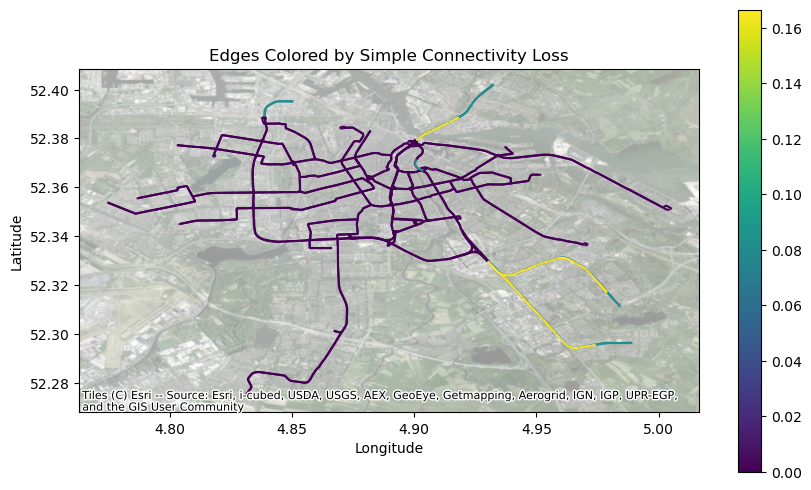

In [163]:
import contextily as ctx
city_two_layer_network_edges_scl_gdf = gpd.GeoDataFrame(city_two_layer_network_edges_scl.copy(), geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))


city_two_layer_network_edges_scl_gdf.plot(column='simple_connectivity_loss', ax=ax, legend=True, cmap='viridis')
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Edges Colored by Simple Connectivity Loss')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()